In [146]:
using HTTP, CSV, DataFrames, StringEncodings, Plots

In [147]:
CONTENT_URL = "https://www.mhlw.go.jp/content/"

"https://www.mhlw.go.jp/content/"

In [148]:
POS_CSV = "pcr_positive_daily.csv"

"pcr_positive_daily.csv"

In [149]:
TST_CSV = "pcr_tested_daily.csv"

"pcr_tested_daily.csv"

In [150]:
SVR_CSV = "severe_daily.csv"

"severe_daily.csv"

In [151]:
DTH_CSV = "death_total.csv"

"death_total.csv"

In [152]:
DL_DIR = "."

"."

In [153]:
HTTP.download(string(CONTENT_URL, POS_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://www.mhlw.go.jp/content/pcr_positive_daily.csv
│   dest = ./pcr_positive_daily.csv
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = ∞ B/s
│   downloaded = 5.224 KiB
│   remaining = 0 bytes
│   total = 5.224 KiB
└ @ HTTP /home/ume/.julia/packages/HTTP/IAI92/src/download.jl:119


"./pcr_positive_daily.csv"

In [154]:
HTTP.download(string(CONTENT_URL, TST_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://www.mhlw.go.jp/content/pcr_tested_daily.csv
│   dest = ./pcr_tested_daily.csv
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = ∞ B/s
│   downloaded = 5.369 KiB
│   remaining = 0 bytes
│   total = 5.369 KiB
└ @ HTTP /home/ume/.julia/packages/HTTP/IAI92/src/download.jl:119


"./pcr_tested_daily.csv"

In [155]:
HTTP.download(string(CONTENT_URL, SVR_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://www.mhlw.go.jp/content/severe_daily.csv
│   dest = ./severe_daily.csv
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = 4.742 MiB/s
│   downloaded = 4.855 KiB
│   remaining = 0 bytes
│   total = 4.855 KiB
└ @ HTTP /home/ume/.julia/packages/HTTP/IAI92/src/download.jl:119


"./severe_daily.csv"

In [156]:
HTTP.download(string(CONTENT_URL, DTH_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://www.mhlw.go.jp/content/death_total.csv
│   dest = ./death_total.csv
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = 2.414 MiB/s
│   downloaded = 4.944 KiB
│   remaining = 0 bytes
│   total = 4.944 KiB
└ @ HTTP /home/ume/.julia/packages/HTTP/IAI92/src/download.jl:119


"./death_total.csv"

In [157]:
ENCODING = enc"UTF-8"

UTF-8 string encoding

In [158]:
RATE_LIMIT = 1.0

1.0

In [159]:
pos_sum = 0

0

In [160]:
function read_csv(file_path)
    df = CSV.File(open(read, file_path, ENCODING)) |> DataFrame
    return df
end

read_csv (generic function with 1 method)

In [161]:
df_pos = read_csv(string(DL_DIR, "/", POS_CSV))

,日付,PCR 検査陽性者数(単日)
,String,Int64
1,2020/1/16,1
2,2020/1/17,0
3,2020/1/18,0
4,2020/1/19,0
5,2020/1/20,0
6,2020/1/21,0
7,2020/1/22,0
8,2020/1/23,0
9,2020/1/24,1


In [162]:
df_tst = read_csv(string(DL_DIR, "/", TST_CSV))

,日付,PCR 検査実施件数(単日)
,String,Int64
1,2020/2/5,4
2,2020/2/6,19
3,2020/2/7,9
4,2020/2/8,4
5,2020/2/9,10
6,2020/2/10,12
7,2020/2/11,4
8,2020/2/12,10
9,2020/2/13,16


In [163]:
df_svr = read_csv(string(DL_DIR, "/", SVR_CSV))

,日付,重症者数
,String,Int64
1,2020/2/5,0
2,2020/2/6,0
3,2020/2/7,0
4,2020/2/8,0
5,2020/2/9,0
6,2020/2/10,0
7,2020/2/11,0
8,2020/2/12,0
9,2020/2/13,0


In [164]:
df_dth = read_csv(string(DL_DIR, "/", DTH_CSV))

,日付,死亡者数
,String,Int64
1,2020/2/14,1
2,2020/2/15,1
3,2020/2/16,1
4,2020/2/17,1
5,2020/2/18,1
6,2020/2/19,1
7,2020/2/20,1
8,2020/2/21,1
9,2020/2/22,1


In [165]:
function get_pos_sum(x)
    global pos_sum += x
    return pos_sum
end

get_pos_sum (generic function with 1 method)

In [166]:
df_pos[:, "累積感染者数"] = map(x -> get_pos_sum(x), df_pos[:, "PCR 検査陽性者数(単日)"])

360-element Array{Int64,1}:
      1
      1
      1
      1
      1
      1
      1
      1
      2
      3
      4
      4
      7
      ⋮
 225618
 229463
 233785
 236891
 239936
 243063
 246365
 251250
 257196
 264733
 272577
 279855

In [167]:
df_tmp = innerjoin(df_pos, df_tst, on = :日付)

,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施件数(単日)
,String,Int64,Int64,Int64
1,2020/2/5,2,16,4
2,2020/2/6,0,16,19
3,2020/2/7,0,16,9
4,2020/2/8,0,16,4
5,2020/2/9,0,16,10
6,2020/2/10,0,16,12
7,2020/2/11,0,16,4
8,2020/2/12,1,17,10
9,2020/2/13,4,21,16


In [168]:
df_tmp2 = innerjoin(df_tmp, df_svr, on = :日付)

,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施件数(単日),重症者数
,String,Int64,Int64,Int64,Int64
1,2020/2/5,2,16,4,0
2,2020/2/6,0,16,19,0
3,2020/2/7,0,16,9,0
4,2020/2/8,0,16,4,0
5,2020/2/9,0,16,10,0
6,2020/2/10,0,16,12,0
7,2020/2/11,0,16,4,0
8,2020/2/12,1,17,10,0
9,2020/2/13,4,21,16,0


In [169]:
df = innerjoin(df_tmp2, df_dth, on = :日付)

,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施件数(単日),重症者数
,String,Int64,Int64,Int64,Int64
1,2020/2/14,7,28,43,2
2,2020/2/15,12,40,86,3
3,2020/2/16,6,46,65,3
4,2020/2/17,7,53,113,3
5,2020/2/18,7,60,9,6
6,2020/2/19,10,70,71,7
7,2020/2/20,9,79,90,9
8,2020/2/21,11,90,85,10
9,2020/2/22,27,117,96,11


In [170]:
df[:, "陽性率"] = df[:, "PCR 検査陽性者数(単日)"] ./ df[:, "PCR 検査実施件数(単日)"]

328-element Array{Float64,1}:
 0.16279069767441862
 0.13953488372093023
 0.09230769230769231
 0.061946902654867256
 0.7777777777777778
 0.14084507042253522
 0.1
 0.12941176470588237
 0.28125
 0.3076923076923077
 0.11538461538461539
 0.18181818181818182
 0.13095238095238096
 ⋮
 0.14466800804828975
 0.18249560966348663
 0.10921036007580544
 0.12388321633694958
 0.34815915847244455
 0.15410773249223794
 0.039151983684697286
 0.05523144065305384
 0.08038719969716225
 0.0925466601178782
 0.12377510927366545
 0.2036943744752309

In [171]:
function get_rate_limited(rate)
    global RATE_LIMIT
    if rate > RATE_LIMIT
        rate = RATE_LIMIT
    end
    return rate
end

get_rate_limited (generic function with 1 method)

In [172]:
df[:, "陽性率"] = map(x -> get_rate_limited(x), df[:, "陽性率"])

328-element Array{Float64,1}:
 0.16279069767441862
 0.13953488372093023
 0.09230769230769231
 0.061946902654867256
 0.7777777777777778
 0.14084507042253522
 0.1
 0.12941176470588237
 0.28125
 0.3076923076923077
 0.11538461538461539
 0.18181818181818182
 0.13095238095238096
 ⋮
 0.14466800804828975
 0.18249560966348663
 0.10921036007580544
 0.12388321633694958
 0.34815915847244455
 0.15410773249223794
 0.039151983684697286
 0.05523144065305384
 0.08038719969716225
 0.0925466601178782
 0.12377510927366545
 0.2036943744752309

In [173]:
df[:, "致死率"] = df[:, "死亡者数"] ./ df[:, "累積感染者数"]

328-element Array{Float64,1}:
 0.03571428571428571
 0.025
 0.021739130434782608
 0.018867924528301886
 0.016666666666666666
 0.014285714285714285
 0.012658227848101266
 0.011111111111111112
 0.008547008547008548
 0.007751937984496124
 0.0070921985815602835
 0.006711409395973154
 0.005847953216374269
 ⋮
 0.01483924154987634
 0.014873857658968984
 0.014795645571786043
 0.014829605177064557
 0.014783108829021072
 0.014802746613018024
 0.014831652223327177
 0.014798009950248756
 0.0147358434812361
 0.014565618944370366
 0.014421612975416121
 0.014275249682871487

In [174]:
println(df)

328×8 DataFrame
 Row │ 日付        PCR 検査陽性者数(単日)  累積感染者数  PCR 検査実施件数(単日)  重症者数  死亡者数  陽性率      致死率     
     │ String      Int64                   Int64         Int64                   Int64     Int64     Float64     Float64    
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 2020/2/14                        7            28                      43         2         1  0.162791    0.0357143
   2 │ 2020/2/15                       12            40                      86         3         1  0.139535    0.025
   3 │ 2020/2/16                        6            46                      65         3         1  0.0923077   0.0217391
   4 │ 2020/2/17                        7            53                     113         3         1  0.0619469   0.0188679
   5 │ 2020/2/18                        7            60                       9         6         1  0.777778    0.0166667
   6 │ 2020/2/19                    

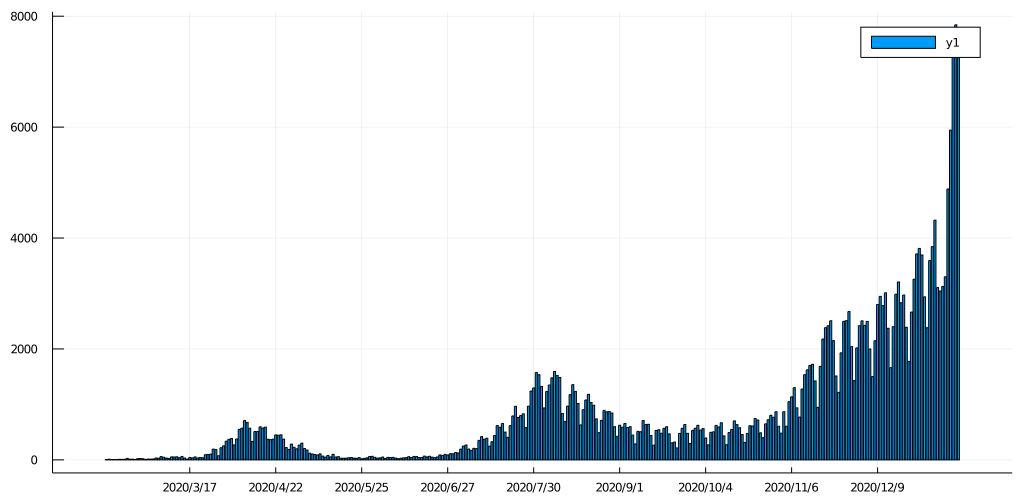

In [175]:
plot(df[:, "日付"], df[:, "PCR 検査陽性者数(単日)"], st=:bar, size=(1024, 500))

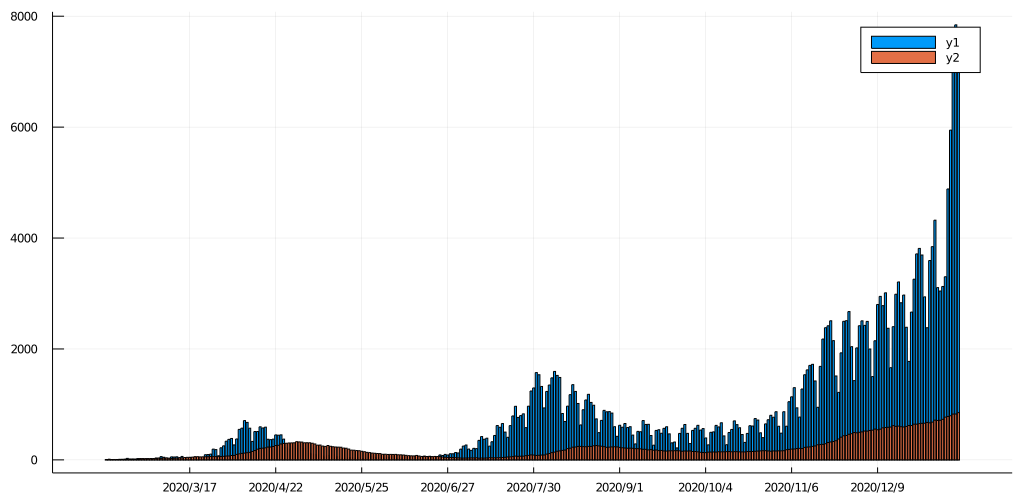

In [176]:
plot!(df[:, "日付"], df[:, "重症者数"], st=:bar, size=(1024, 500))

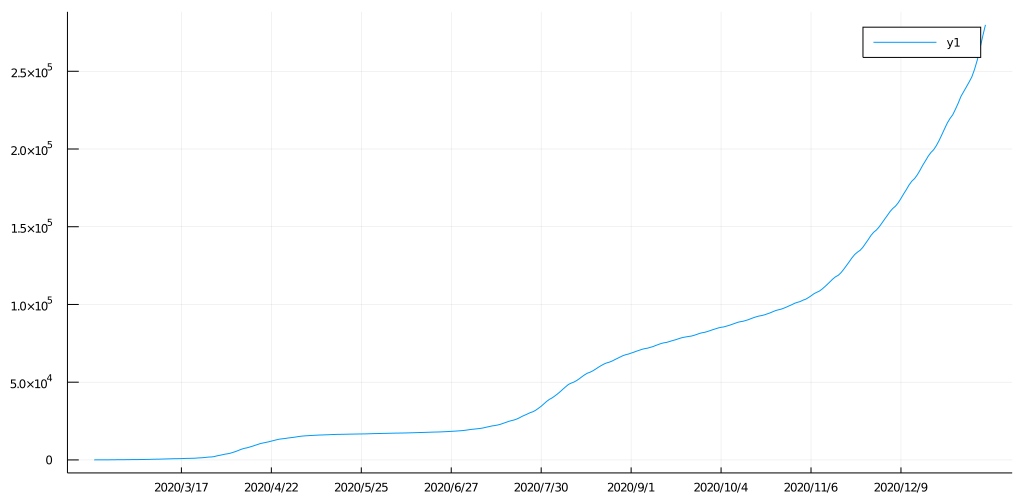

In [177]:
plot(df[:, "日付"], df[:, "累積感染者数"], size=(1024, 500))

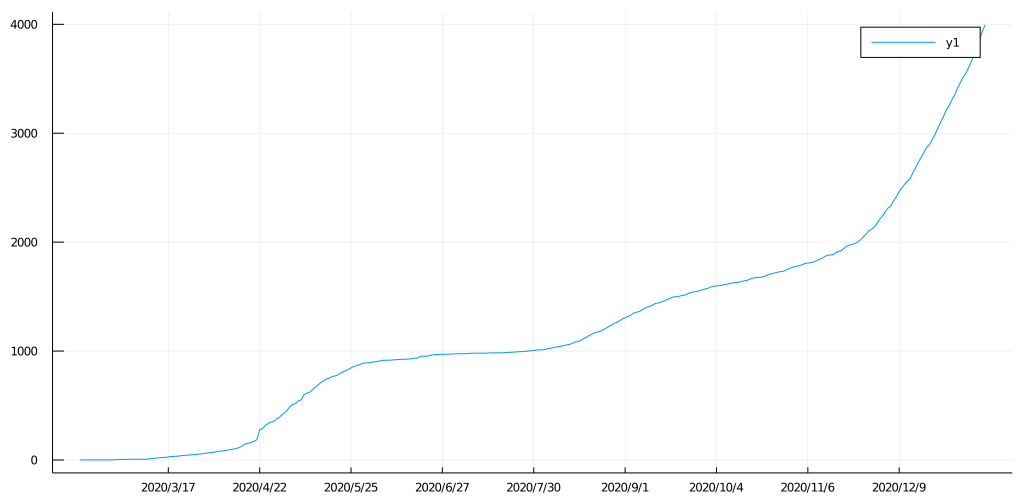

In [178]:
plot(df[:, "日付"], df[:, "死亡者数"], size=(1024, 500))

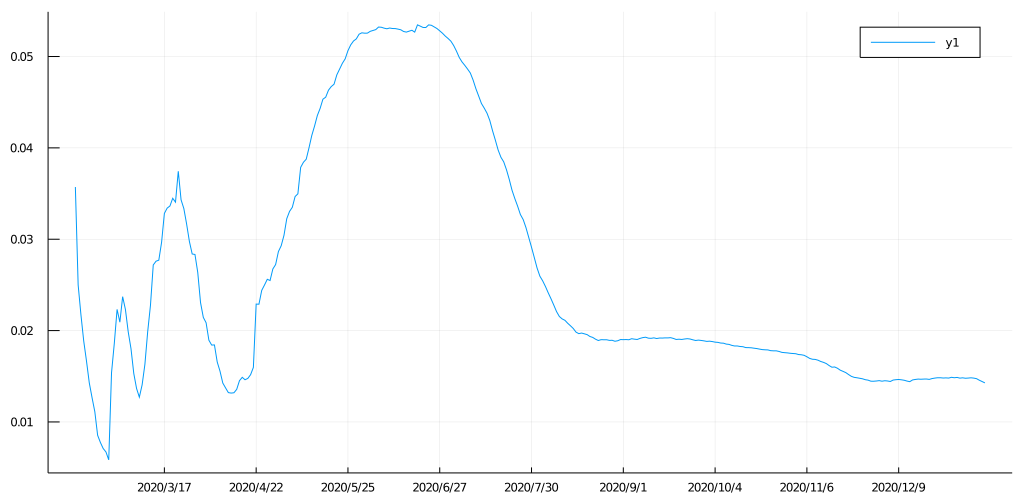

In [179]:
plot(df[:, "日付"], df[:, "致死率"], size=(1024, 500))

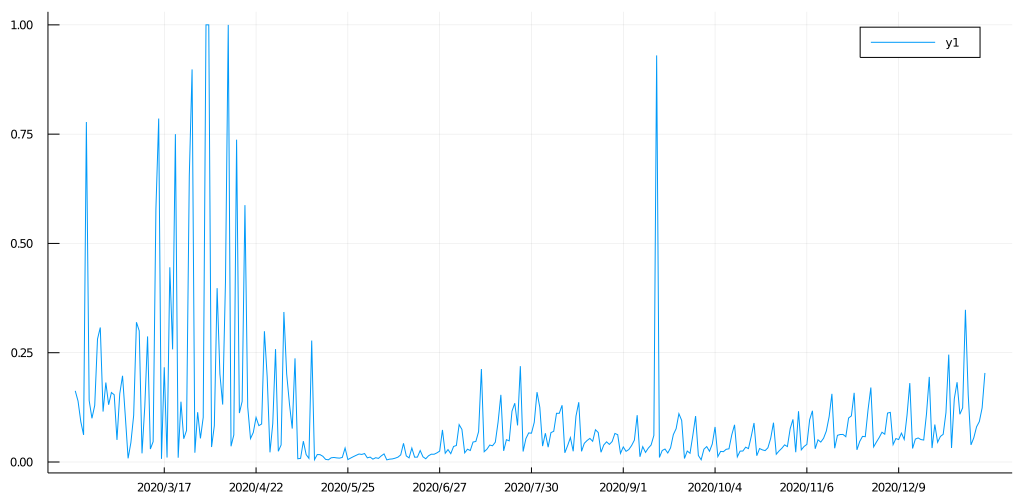

In [180]:
plot(df[:, "日付"], df[:, "陽性率"], size=(1024, 500))